# Primary Analysis

In [1]:
#pip install pandas

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
file_path = 'Major Practice.xlsx'

In [5]:
df = pd.read_excel(file_path, sheet_name='LR')

In [6]:
df.head(5)

,Pincode,Nearest_station,Muncipal_corporation,Income,distance_station,Hospitals_under_3kms,distance_clinic,distance_market,distance_school,highway,IS_Building,room_type,Staying_in_yrs.1,parking,Carpet_area1,Price,Own_house,house_Satisfaction_Yes_No,Balcony,Terrace,Lift,Pool,Gym,Kids refreshment area,Walking & cycling tracks,Gaming Parlor,Party halls,Parks & Gardens,Gas Pipeline,Public Washroom
0,400029,Santacruz,Greater Mumbai (BMC or MCGM),3 Lakh - 5 Lakh,2279,7,984,405,323,2,0,1,2,1,150,30,Yes,No,1,0,0,0,0,0,0,0,0,1,0,0
1,400083,Vikhroli,Greater Mumbai (BMC or MCGM),1 Lakh - 3 Lakh,442,4,289,539,268,2,0,1,2,1,250,17,Yes,No,0,0,0,0,0,0,0,0,0,1,0,1
2,421306,Kalyan,Kalyan-Dombivali,1 Lakh - 3 Lakh,2224,5,550,710,872,2,0,1,0,1,350,15,No,Yes,0,0,0,0,0,0,0,0,0,1,0,0
3,400708,Airoli,Navi Mumbai,7 lakh - 10 Lakh,357,3,492,592,484,2,0,2,2,1,250,80,Yes,Yes,0,1,0,0,0,0,0,0,0,1,0,0
4,400070,Vidyavihar,Greater Mumbai (BMC or MCGM),< 1 Lakh,2011,8,983,768,743,1,0,1,3,0,150,40,Yes,No,0,0,0,0,0,0,0,0,0,1,0,1


In [7]:
df.columns

Index(['Pincode', 'Nearest_station', 'Muncipal_corporation', 'Income',
       'distance_station', 'Hospitals_under_3kms', 'distance_clinic',
       'distance_market', 'distance_school', 'highway', 'IS_Building',
       'room_type', 'Staying_in_yrs.1', 'parking', 'Carpet_area1', 'Price',
       'Own_house', 'house_Satisfaction_Yes_No', 'Balcony', 'Terrace', 'Lift',
       'Pool', 'Gym', 'Kids refreshment area', 'Walking & cycling tracks',
       'Gaming Parlor', 'Party halls', 'Parks & Gardens', 'Gas Pipeline',
       'Public Washroom'],
      dtype='object')

In [8]:
df.shape

(206, 30)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Pincode                    206 non-null    int64 
 1   Nearest_station            206 non-null    object
 2   Muncipal_corporation       206 non-null    object
 3   Income                     206 non-null    object
 4   distance_station           206 non-null    int64 
 5   Hospitals_under_3kms       206 non-null    int64 
 6   distance_clinic            206 non-null    int64 
 7   distance_market            206 non-null    int64 
 8   distance_school            206 non-null    int64 
 9   highway                    206 non-null    int64 
 10  IS_Building                206 non-null    int64 
 11  room_type                  206 non-null    int64 
 12  Staying_in_yrs.1           206 non-null    int64 
 13  parking                    206 non-null    int64 
 14  Carpet_are

# CountPlot of data

In [10]:
plot_data = df.drop(['Pincode','distance_station',
       'Hospitals_under_3kms', 'distance_clinic', 'distance_market',
       'distance_school','Carpet_area1', 'Price','Public Washroom'], axis=1)

In [11]:
plot_data.columns

Index(['Nearest_station', 'Muncipal_corporation', 'Income', 'highway',
       'IS_Building', 'room_type', 'Staying_in_yrs.1', 'parking', 'Own_house',
       'house_Satisfaction_Yes_No', 'Balcony', 'Terrace', 'Lift', 'Pool',
       'Gym', 'Kids refreshment area', 'Walking & cycling tracks',
       'Gaming Parlor', 'Party halls', 'Parks & Gardens', 'Gas Pipeline'],
      dtype='object')

In [12]:
# plt.figure(figsize = (20,18))
# plt.subplot(2,2,1)
# sns.countplot(df['Income'])
# plt.xticks(rotation=45)
# plt.subplot(2,2,2)
# sns.countplot(df['room_type'])
# plt.xticks(rotation=45)
# plt.subplot(2,2,3)
# sns.countplot(df['Own_house'])
# plt.xticks(rotation=45)
# plt.subplot(2,2,4)
# sns.countplot(df['parking'])
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# # plt.subplot()

In [13]:
# for column in plot_data.columns:
#     plt.figure()  # Create a new figure for each count plot
#     sns.countplot(data=plot_data, x=column)
#     plt.title(f'Count Plot of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.tight_layout()

# # Display the plots
# plt.show()

In [14]:
# plt.savefig(f'count_plot_{column}.png')

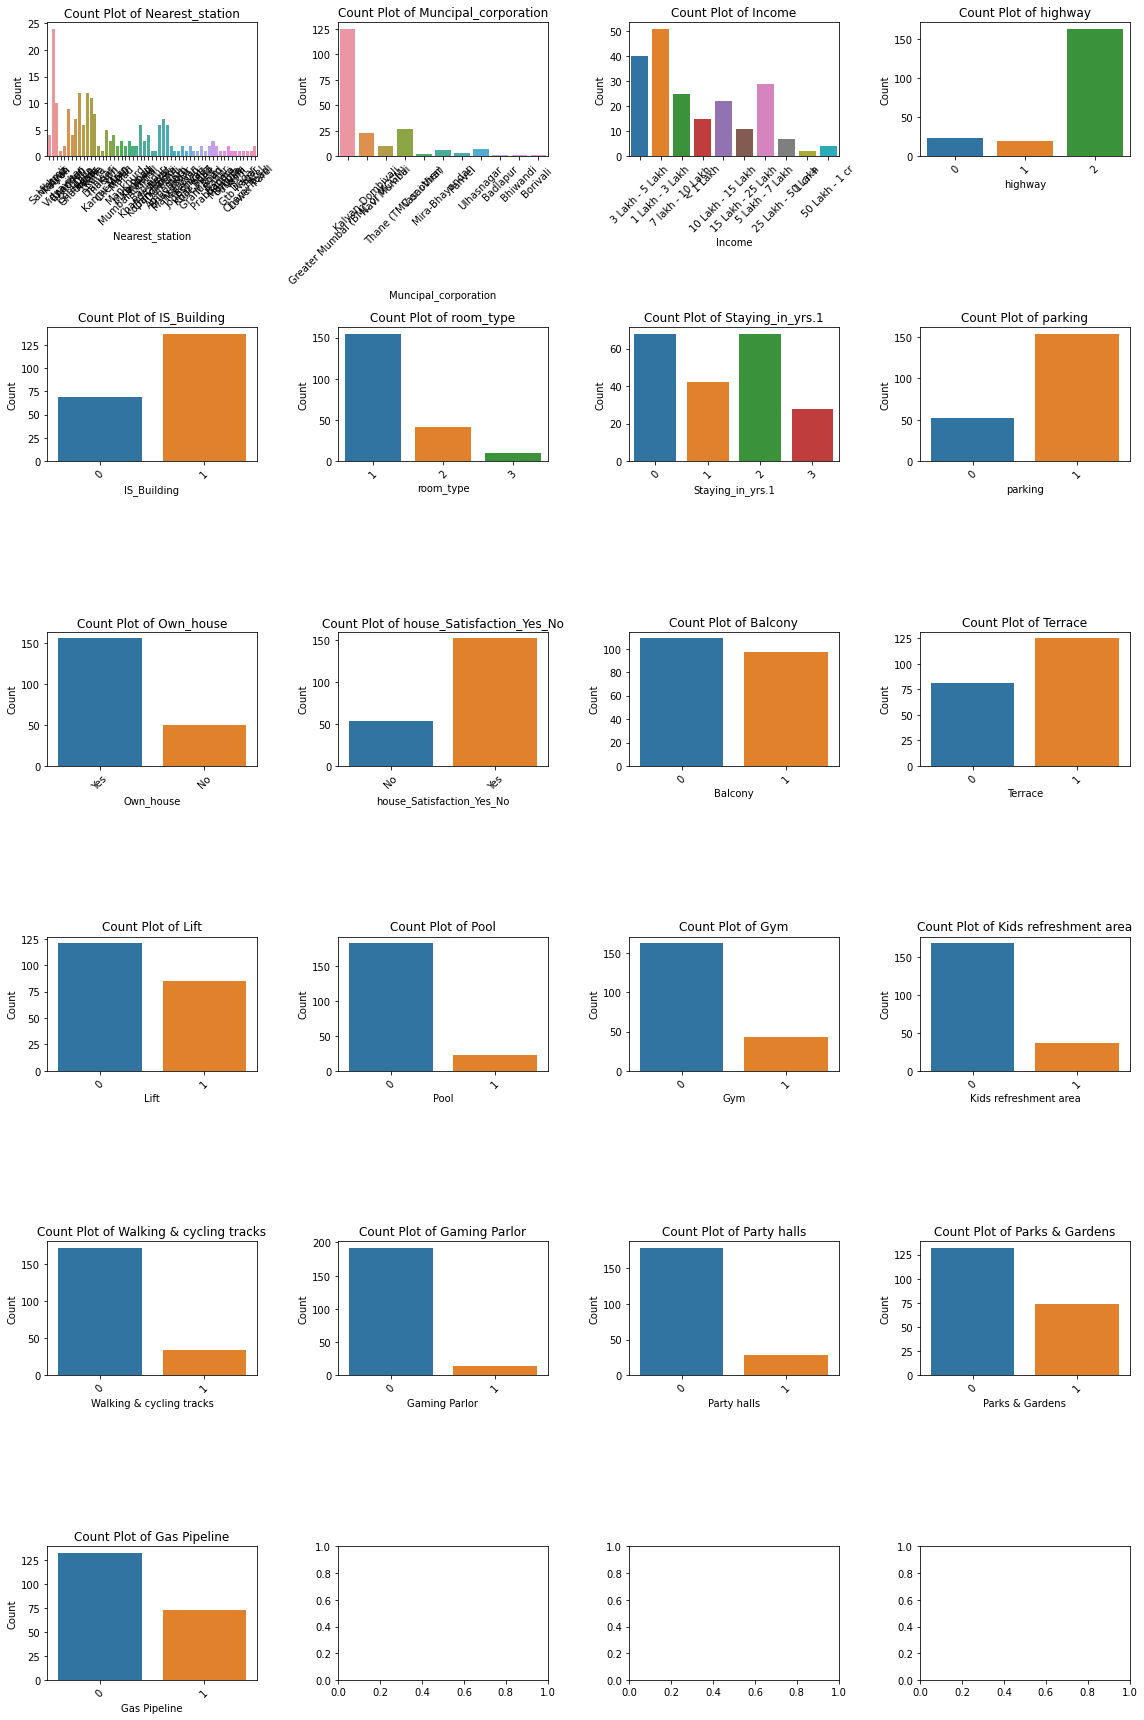

In [15]:
# Determine the number of plots and the layout
num_plots = len(plot_data.columns)
num_rows = (num_plots + 3) // 4  # Number of rows rounded up
num_cols = min(num_plots, 4)  # Maximum of 4 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))  # Adjust the figsize as needed

# Iterate over the columns and create count plots
row = 0
col = 0
for i, column in enumerate(plot_data.columns):
    sns.countplot(data=plot_data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'Count Plot of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)
    
    col += 1
    if col == num_cols:
        col = 0
        row += 1

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [18]:
# plt.figure(figsize = (40,36))
# plt.subplot(3,1,1)
# sns.countplot(df['Muncipal Corporation'])
# plt.xticks(rotation=60)
# plt.subplot(3,1,2)
# sns.countplot(df['Income1'])
# plt.xticks(rotation=60)


# plt.tight_layout()
# plt.show()
# # plt.subplot()

In [19]:
# plt.figure(figsize = (20,18))
# plt.subplot()
# sns.countplot(df['Muncipal_corporation'])
# plt.xticks(rotation=30)

# plt.show()

In [20]:
# plt.figure(figsize = (20,18))
# plt.subplot()
# sns.countplot(df['Income'])
# plt.xticks(rotation=30)

# plt.show()

In [21]:
# plt.figure(figsize = (20,18))
# plt.subplot()
# sns.countplot(df['Carpet_area'])
# plt.xticks(rotation=30)

# plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df['Hospitals_under_3kms']

0      7
1      4
2      5
3      3
4      8
      ..
201    3
202    3
203    5
204    3
205    4
Name: Hospitals_under_3kms, Length: 206, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Pincode                    206 non-null    int64 
 1   Nearest_station            206 non-null    object
 2   Muncipal_corporation       206 non-null    object
 3   Income                     206 non-null    object
 4   distance_station           206 non-null    int64 
 5   Hospitals_under_3kms       206 non-null    int64 
 6   distance_clinic            206 non-null    int64 
 7   distance_market            206 non-null    int64 
 8   distance_school            206 non-null    int64 
 9   highway                    206 non-null    int64 
 10  IS_Building                206 non-null    int64 
 11  room_type                  206 non-null    int64 
 12  Staying_in_yrs.1           206 non-null    int64 
 13  parking                    206 non-null    int64 
 14  Carpet_are

In [25]:
# Assuming 'df' is your DataFrame and 'Municipal Corporation' is the column name
municipal_corp_column = df['Muncipal_corporation']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the column and transform the values
encoded_values = label_encoder.fit_transform(municipal_corp_column)

# Replace the original column with the encoded values
df['Muncipal Corporation'] = encoded_values

In [26]:
# Assuming 'df' is your DataFrame and 'Municipal Corporation' is the column name
Income = df['Income']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the column and transform the values
encoded_values = label_encoder.fit_transform(Income)

# Replace the original column with the encoded values
df['Income1'] = encoded_values

In [27]:
# Assuming 'df' is your DataFrame and 'Municipal Corporation' is the column name
own_house = df['Own_house']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the column and transform the values
encoded_values = label_encoder.fit_transform(own_house)

# Replace the original column with the encoded values
df['own_house'] = encoded_values

In [28]:
# Assuming 'df' is your DataFrame and 'Municipal Corporation' is the column name
house_sat = df['house_Satisfaction_Yes_No']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the column and transform the values
encoded_values = label_encoder.fit_transform(house_sat)

# Replace the original column with the encoded values
df['house_sat'] = encoded_values

In [29]:
df.columns

Index(['Pincode', 'Nearest_station', 'Muncipal_corporation', 'Income',
       'distance_station', 'Hospitals_under_3kms', 'distance_clinic',
       'distance_market', 'distance_school', 'highway', 'IS_Building',
       'room_type', 'Staying_in_yrs.1', 'parking', 'Carpet_area1', 'Price',
       'Own_house', 'house_Satisfaction_Yes_No', 'Balcony', 'Terrace', 'Lift',
       'Pool', 'Gym', 'Kids refreshment area', 'Walking & cycling tracks',
       'Gaming Parlor', 'Party halls', 'Parks & Gardens', 'Gas Pipeline',
       'Public Washroom', 'Muncipal Corporation', 'Income1', 'own_house',
       'house_sat'],
      dtype='object')

In [30]:
df['Muncipal Corporation']

0      3
1      3
2      4
3      6
4      3
      ..
201    3
202    3
203    3
204    3
205    3
Name: Muncipal Corporation, Length: 206, dtype: int32

In [31]:
boxplot_data1 = df.drop(['Nearest_station', 'Muncipal_corporation', 'Income','Own_house', 'house_Satisfaction_Yes_No'], axis=1)

In [32]:
boxplot_data = df.drop(['Pincode','Nearest_station','distance_station',
       'Hospitals_under_3kms', 'distance_clinic', 'distance_market',
       'distance_school','Carpet_area1', 'Price','Public Washroom'], axis=1)

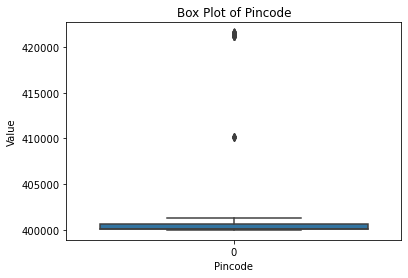

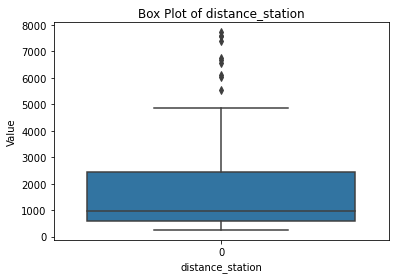

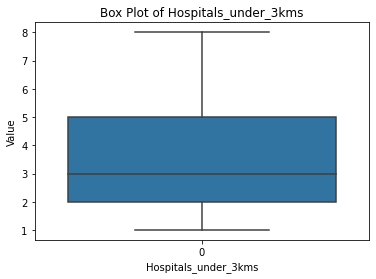

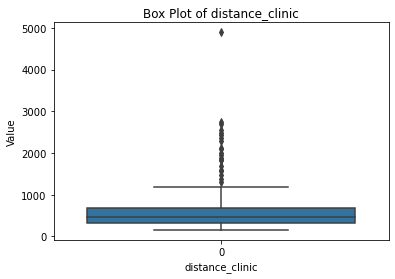

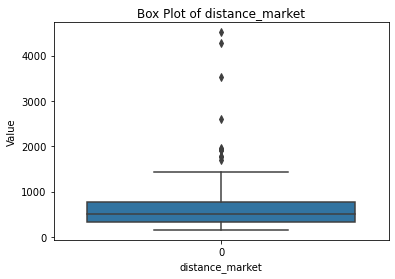

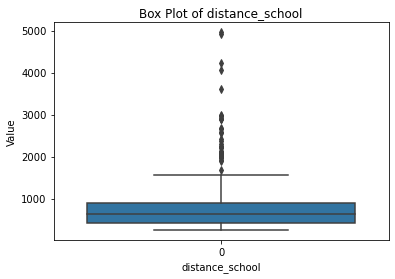

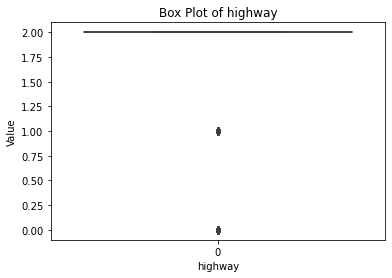

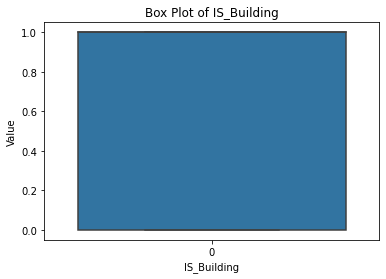

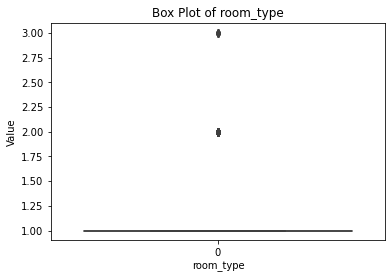

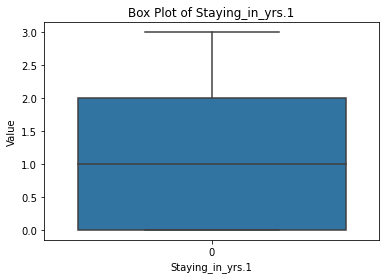

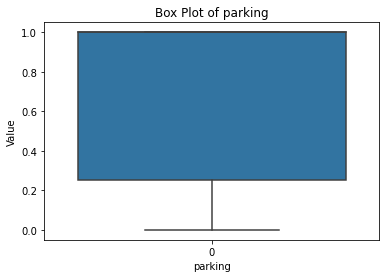

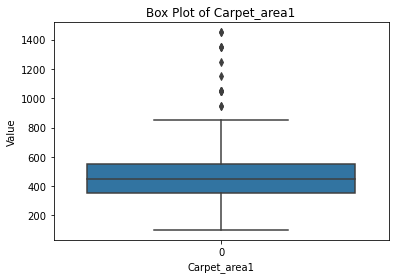

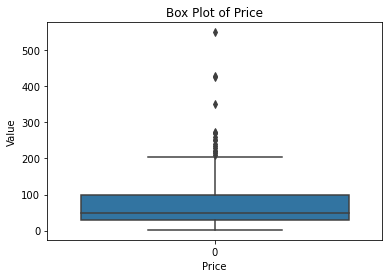

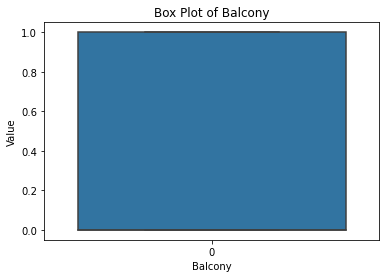

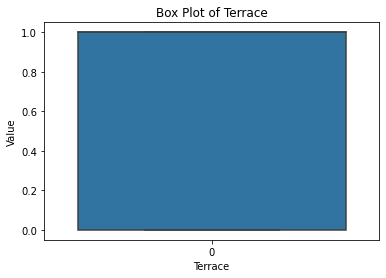

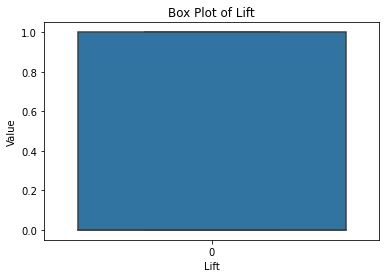

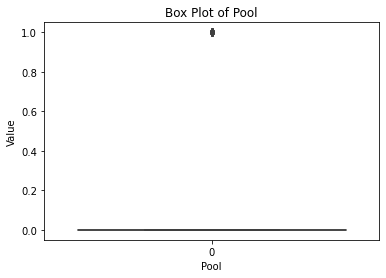

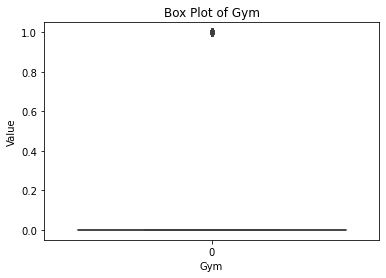

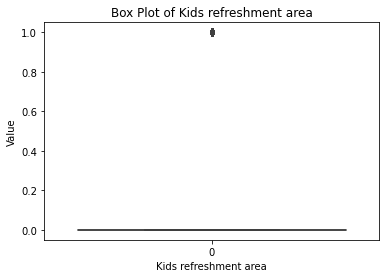

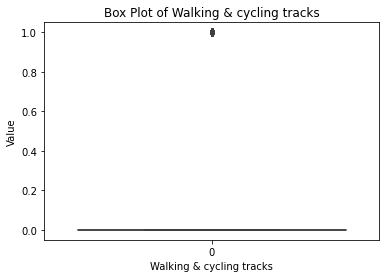

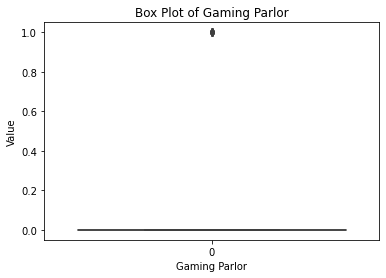

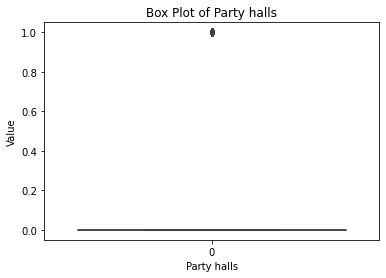

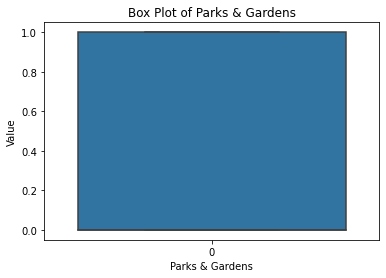

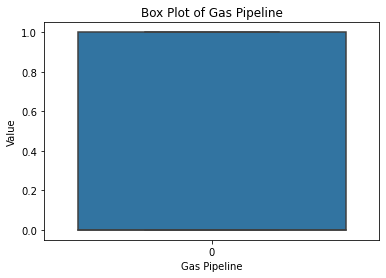

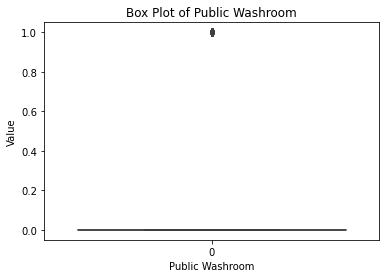

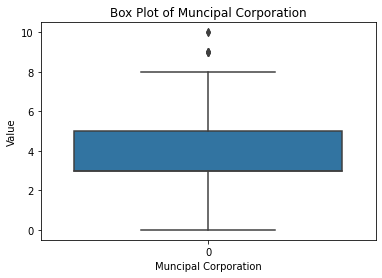

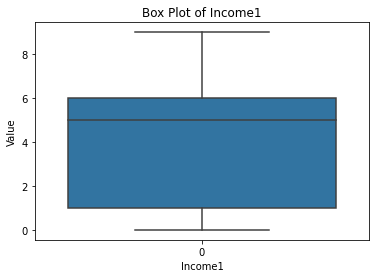

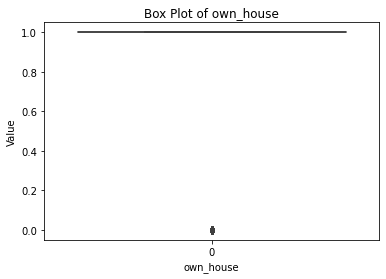

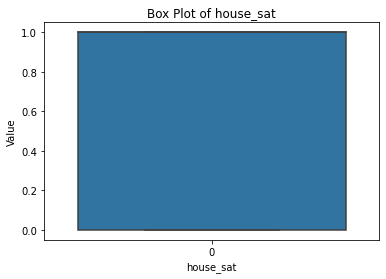

In [33]:
for column in boxplot_data1.columns:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(data=boxplot_data1[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

# Display the plots
plt.show()

In [34]:
plt.savefig('boxplot.png')

<Figure size 432x288 with 0 Axes>

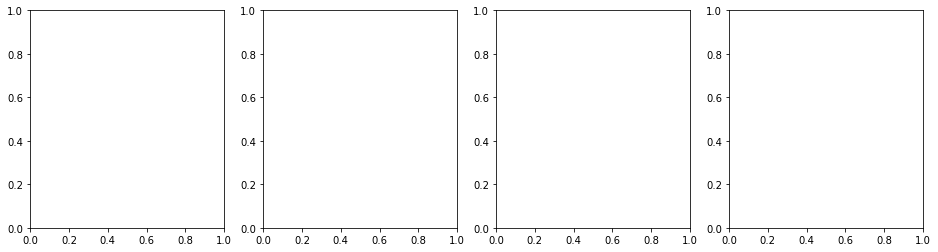

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Create a figure with 1 row and 4 columns

# for i, column in enumerate(boxplot_data1.columns):
#     sns.boxplot(data=boxplot_data1[column], ax=axes[i])  # Assign each box plot to a specific subplot
#     axes[i].set_title(f'Box Plot of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Value')

# plt.tight_layout()  # Adjust the spacing between subplots
# plt.show()

In [37]:
boxplot_data1.columns

Index(['Pincode', 'distance_station', 'Hospitals_under_3kms',
       'distance_clinic', 'distance_market', 'distance_school', 'highway',
       'IS_Building', 'room_type', 'Staying_in_yrs.1', 'parking',
       'Carpet_area1', 'Price', 'Balcony', 'Terrace', 'Lift', 'Pool', 'Gym',
       'Kids refreshment area', 'Walking & cycling tracks', 'Gaming Parlor',
       'Party halls', 'Parks & Gardens', 'Gas Pipeline', 'Public Washroom',
       'Muncipal Corporation', 'Income1', 'own_house', 'house_sat'],
      dtype='object')

### Statistical Tests

In [38]:
df.head()

,Pincode,Nearest_station,Muncipal_corporation,Income,distance_station,Hospitals_under_3kms,distance_clinic,distance_market,distance_school,highway,IS_Building,room_type,Staying_in_yrs.1,parking,Carpet_area1,Price,Own_house,house_Satisfaction_Yes_No,Balcony,Terrace,Lift,Pool,Gym,Kids refreshment area,Walking & cycling tracks,Gaming Parlor,Party halls,Parks & Gardens,Gas Pipeline,Public Washroom,Muncipal Corporation,Income1,own_house,house_sat
0,400029,Santacruz,Greater Mumbai (BMC or MCGM),3 Lakh - 5 Lakh,2279,7,984,405,323,2,0,1,2,1,150,30,Yes,No,1,0,0,0,0,0,0,0,0,1,0,0,3,5,1,0
1,400083,Vikhroli,Greater Mumbai (BMC or MCGM),1 Lakh - 3 Lakh,442,4,289,539,268,2,0,1,2,1,250,17,Yes,No,0,0,0,0,0,0,0,0,0,1,0,1,3,0,1,0
2,421306,Kalyan,Kalyan-Dombivali,1 Lakh - 3 Lakh,2224,5,550,710,872,2,0,1,0,1,350,15,No,Yes,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1
3,400708,Airoli,Navi Mumbai,7 lakh - 10 Lakh,357,3,492,592,484,2,0,2,2,1,250,80,Yes,Yes,0,1,0,0,0,0,0,0,0,1,0,0,6,8,1,1
4,400070,Vidyavihar,Greater Mumbai (BMC or MCGM),< 1 Lakh,2011,8,983,768,743,1,0,1,3,0,150,40,Yes,No,0,0,0,0,0,0,0,0,0,1,0,1,3,9,1,0


#### Income V/s Own House

In [39]:
contingency_income_own_house = pd.crosstab(df['Income'], df['Own_house'])
contingency_income_own_house

Own_house,No,Yes
Income,,
1 Lakh - 3 Lakh,15,36
1 cr +,0,2
10 Lakh - 15 Lakh,3,19
15 Lakh - 25 Lakh,3,8
25 Lakh - 50 Lakh,1,6
3 Lakh - 5 Lakh,12,28
5 Lakh - 7 Lakh,5,24
50 Lakh - 1 cr,0,4
7 lakh - 10 Lakh,5,20


In [40]:

# Create a contingency table (2D array) with observed frequencies
observed = np.array(contingency_income_own_house)

# Perform the chi-square test
chi2, p_value, degrees_of_freedom, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", degrees_of_freedom)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 8.204517544659533
P-value: 0.513674572531857
Degrees of freedom: 9
Expected frequencies:
[[12.37864078 38.62135922]
 [ 0.48543689  1.51456311]
 [ 5.33980583 16.66019417]
 [ 2.66990291  8.33009709]
 [ 1.69902913  5.30097087]
 [ 9.70873786 30.29126214]
 [ 7.03883495 21.96116505]
 [ 0.97087379  3.02912621]
 [ 6.06796117 18.93203883]
 [ 3.6407767  11.3592233 ]]


In [41]:
# Since, the p-value is >0.05, we conclude that there is no significance differnce between Income and Owning the house.

#### Income vs carpet area

In [42]:
contingency_income_carpet = pd.crosstab(df['Income'], df['Carpet_area1'])
contingency_income_carpet

Carpet_area1,100,150,250,350,450,550,650,750,850,950,1050,1150,1250,1350,1450
Income,,,,,,,,,,,,,,,
1 Lakh - 3 Lakh,1,4,13,9,9,9,2,0,2,0,2,0,0,0,0
1 cr +,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
10 Lakh - 15 Lakh,0,1,1,3,5,3,2,3,1,0,1,1,0,1,0
15 Lakh - 25 Lakh,0,0,0,2,3,2,1,1,0,0,1,0,0,1,0
25 Lakh - 50 Lakh,0,0,0,1,0,0,2,1,2,0,0,0,0,0,1
3 Lakh - 5 Lakh,2,3,8,9,6,4,2,2,2,1,1,0,0,0,0
5 Lakh - 7 Lakh,0,0,4,6,9,6,1,1,0,0,1,0,1,0,0
50 Lakh - 1 cr,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0
7 lakh - 10 Lakh,0,0,1,4,8,3,2,3,2,1,0,0,0,0,1


In [43]:
# Create a contingency table (2D array) with observed frequencies
observed = np.array(contingency_income_carpet)

# Perform the chi-square test
chi2, p_value, degrees_of_freedom, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", degrees_of_freedom)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 165.0798401427419
P-value: 0.011118389129944747
Degrees of freedom: 126
Expected frequencies:
[[1.23786408e+00 3.21844660e+00 7.67475728e+00 8.91262136e+00
  1.03980583e+01 7.67475728e+00 3.21844660e+00 2.72330097e+00
  2.22815534e+00 4.95145631e-01 1.48543689e+00 2.47572816e-01
  2.47572816e-01 7.42718447e-01 4.95145631e-01]
 [4.85436893e-02 1.26213592e-01 3.00970874e-01 3.49514563e-01
  4.07766990e-01 3.00970874e-01 1.26213592e-01 1.06796117e-01
  8.73786408e-02 1.94174757e-02 5.82524272e-02 9.70873786e-03
  9.70873786e-03 2.91262136e-02 1.94174757e-02]
 [5.33980583e-01 1.38834951e+00 3.31067961e+00 3.84466019e+00
  4.48543689e+00 3.31067961e+00 1.38834951e+00 1.17475728e+00
  9.61165049e-01 2.13592233e-01 6.40776699e-01 1.06796117e-01
  1.06796117e-01 3.20388350e-01 2.13592233e-01]
 [2.66990291e-01 6.94174757e-01 1.65533981e+00 1.92233010e+00
  2.24271845e+00 1.65533981e+00 6.94174757e-01 5.87378641e-01
  4.80582524e-01 1.06796117e-01 3.20388350e-01 5.33980583e

In [44]:
# Since, the p-value is less than 0.05, we conclude that there is significance difference between income and carpet area

In [45]:
from scipy.stats import shapiro, levene

# Shapiro-Wilk test for normality
stat, p = shapiro(df['Carpet_area1'])
print('Shapiro-Wilk test for normality of WorkingHour:')
print(f'Statistics = {stat}, p-value = {p}')
if p > 0.05:
    print('The distribution is normal')
else:
    print('The distribution is not normal')

# # Levene's test for equality of variance
# stat, p = levene(data[data['Sector']=='Private']['WorkHour/Day'], 
#                  data[data['Sector']=='Government']['WorkHour/Day'])
# print('Levene\'s test for equality of variance:')
# print(f'Statistics = {stat}, p-value = {p}')
# if p > 0.05:
#     print('The variances are equal')
# else:
#     print('The variances are not equal')

Shapiro-Wilk test for normality of WorkingHour:
Statistics = 0.8916721940040588, p-value = 4.8598940843858074e-11
The distribution is not normal


<AxesSubplot:xlabel='Carpet_area1', ylabel='Density'>

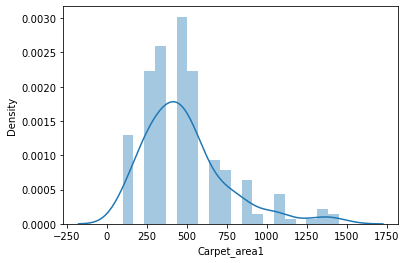

In [46]:
sns.distplot(df['Carpet_area1'])

# Factor Analysis

In [47]:
# pip install factor_analyzer

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import calculate_kmo

In [49]:
df.isna().sum()

Pincode                      0
Nearest_station              0
Muncipal_corporation         0
Income                       0
distance_station             0
Hospitals_under_3kms         0
distance_clinic              0
distance_market              0
distance_school              0
highway                      0
IS_Building                  0
room_type                    0
Staying_in_yrs.1             0
parking                      0
Carpet_area1                 0
Price                        0
Own_house                    0
house_Satisfaction_Yes_No    0
Balcony                      0
Terrace                      0
Lift                         0
Pool                         0
Gym                          0
Kids refreshment area        0
Walking & cycling tracks     0
Gaming Parlor                0
Party halls                  0
Parks & Gardens              0
Gas Pipeline                 0
Public Washroom              0
Muncipal Corporation         0
Income1                      0
own_hous

In [50]:
df.columns

Index(['Pincode', 'Nearest_station', 'Muncipal_corporation', 'Income',
       'distance_station', 'Hospitals_under_3kms', 'distance_clinic',
       'distance_market', 'distance_school', 'highway', 'IS_Building',
       'room_type', 'Staying_in_yrs.1', 'parking', 'Carpet_area1', 'Price',
       'Own_house', 'house_Satisfaction_Yes_No', 'Balcony', 'Terrace', 'Lift',
       'Pool', 'Gym', 'Kids refreshment area', 'Walking & cycling tracks',
       'Gaming Parlor', 'Party halls', 'Parks & Gardens', 'Gas Pipeline',
       'Public Washroom', 'Muncipal Corporation', 'Income1', 'own_house',
       'house_sat'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Pincode                    206 non-null    int64 
 1   Nearest_station            206 non-null    object
 2   Muncipal_corporation       206 non-null    object
 3   Income                     206 non-null    object
 4   distance_station           206 non-null    int64 
 5   Hospitals_under_3kms       206 non-null    int64 
 6   distance_clinic            206 non-null    int64 
 7   distance_market            206 non-null    int64 
 8   distance_school            206 non-null    int64 
 9   highway                    206 non-null    int64 
 10  IS_Building                206 non-null    int64 
 11  room_type                  206 non-null    int64 
 12  Staying_in_yrs.1           206 non-null    int64 
 13  parking                    206 non-null    int64 
 14  Carpet_are

In [52]:
data2 = df.drop(['Pincode', 'Nearest_station', 'Muncipal_corporation', 
                 'Income','Hospitals_under_3kms','Own_house', 'house_Satisfaction_Yes_No',
                 'Gas Pipeline','Public Washroom'], axis=1)

In [53]:
data_f = data2.drop(['Price'],axis=1)

In [54]:
data_f.columns

Index(['distance_station', 'distance_clinic', 'distance_market',
       'distance_school', 'highway', 'IS_Building', 'room_type',
       'Staying_in_yrs.1', 'parking', 'Carpet_area1', 'Balcony', 'Terrace',
       'Lift', 'Pool', 'Gym', 'Kids refreshment area',
       'Walking & cycling tracks', 'Gaming Parlor', 'Party halls',
       'Parks & Gardens', 'Muncipal Corporation', 'Income1', 'own_house',
       'house_sat'],
      dtype='object')

In [55]:
data_f.head()

,distance_station,distance_clinic,distance_market,distance_school,highway,IS_Building,room_type,Staying_in_yrs.1,parking,Carpet_area1,Balcony,Terrace,Lift,Pool,Gym,Kids refreshment area,Walking & cycling tracks,Gaming Parlor,Party halls,Parks & Gardens,Muncipal Corporation,Income1,own_house,house_sat
0,2279,984,405,323,2,0,1,2,1,150,1,0,0,0,0,0,0,0,0,1,3,5,1,0
1,442,289,539,268,2,0,1,2,1,250,0,0,0,0,0,0,0,0,0,1,3,0,1,0
2,2224,550,710,872,2,0,1,0,1,350,0,0,0,0,0,0,0,0,0,1,4,0,0,1
3,357,492,592,484,2,0,2,2,1,250,0,1,0,0,0,0,0,0,0,1,6,8,1,1
4,2011,983,768,743,1,0,1,3,0,150,0,0,0,0,0,0,0,0,0,1,3,9,1,0


[]

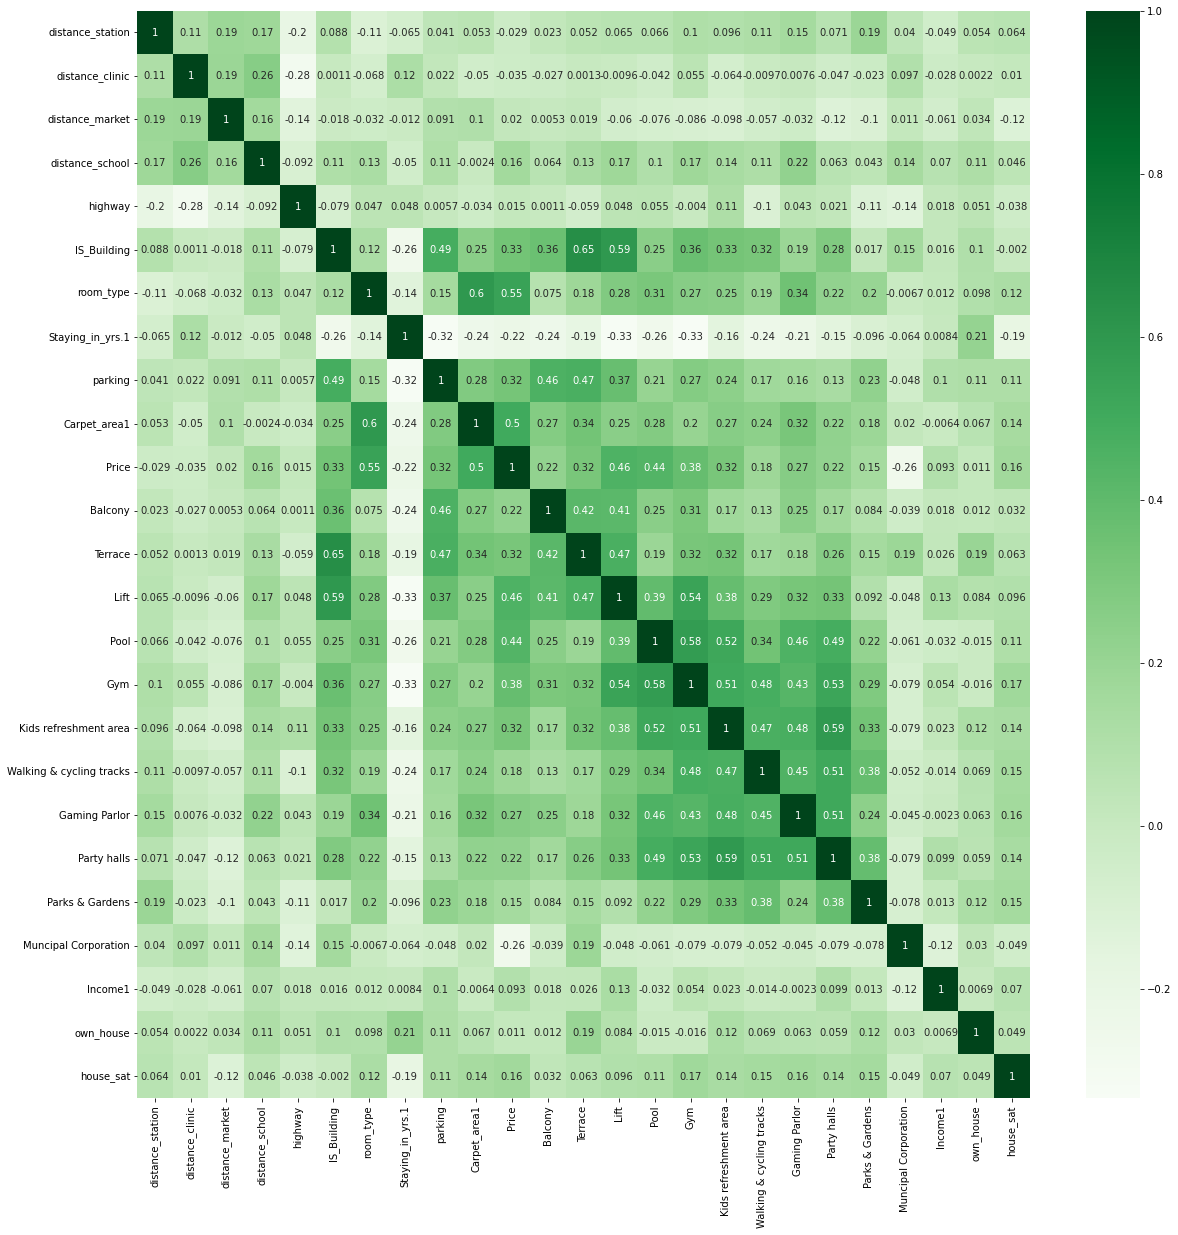

In [56]:
# Correlation between vars
plt.figure(figsize=(20,20))
corr_plot = sns.heatmap(data2.corr(), cmap="Greens", annot=True)
plt.plot()

In [57]:


# Set the desired figure size (optional)
corr_plot.figure.set_size_inches(20,20)

# Save the plot in high resolution
corr_plot.figure.savefig("corr_plot.png", dpi=300)

In [58]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_f.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_f.values, i)
                          for i in range(len(data_f.columns))]
  
vif_data

,feature,VIF
0,distance_station,2.629472
1,distance_clinic,2.636781
2,distance_market,2.584880
3,distance_school,2.810999
4,highway,6.302283
5,IS_Building,7.882994
6,room_type,11.735864
7,Staying_in_yrs.1,3.312525
8,parking,7.404074
9,Carpet_area1,8.904497


In [59]:
chi_sq, p_value = calculate_bartlett_sphericity(data_f)
chi_sq
print("Chi_sq: {}, p-value: {}".format(chi_sq, p_value))

Chi_sq: 1429.9344636571116, p-value: 8.375194227360654e-155


In [60]:
kmo_all,kmo_model=calculate_kmo(data_f)

In [61]:
kmo_model

0.7911392224663597

In [62]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(data_f)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.48835042, 2.02254475, 1.75921936, 1.34949335, 1.30778213,
       1.18264902, 1.14982077, 1.08518794, 0.94433739, 0.86843813,
       0.77032287, 0.73795731, 0.67892241, 0.65981877, 0.60630858,
       0.5531629 , 0.49815509, 0.44333407, 0.40751893, 0.36280739,
       0.33622219, 0.31789055, 0.25066445, 0.21909122])

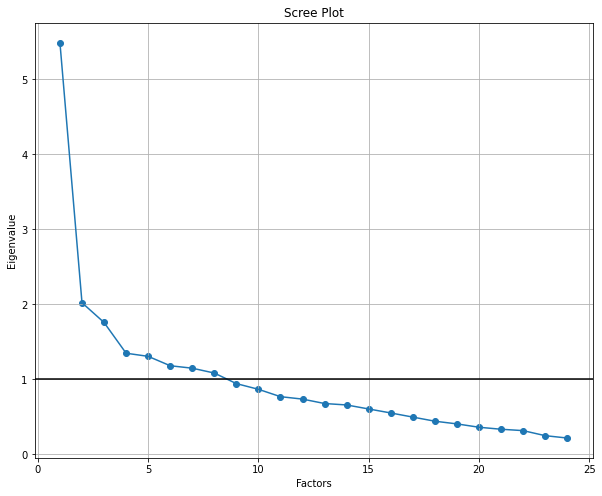

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(range(1,data_f.shape[1]+1),ev)
plt.plot(range(1,data_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.axhline(y=1,c='k')
plt.show()

In [64]:
fa_v = FactorAnalyzer(8, rotation="varimax")
fa_v.fit(data_f)
loadsvarimax = fa_v.loadings_
loadsvarimax_data = pd.DataFrame(loadsvarimax)
loadsvarimax_data.head()

,0,1,2,3,4,5,6,7
0,0.131326,0.044793,-0.101678,0.310105,0.184932,0.001499,0.030345,-0.203747
1,-0.042231,-0.037384,-0.046383,0.533764,0.019463,0.032506,0.098522,0.018335
2,-0.137902,0.086672,0.050426,0.385384,-0.066265,0.014273,-0.093983,-0.379427
3,0.158220,0.079303,0.071839,0.518407,-0.059847,0.085899,0.028784,0.085981
4,0.077601,0.004995,0.035935,-0.364821,-0.288010,0.118598,-0.294509,0.085780


In [65]:
loadsvarimax_data.index = data_f.columns

In [66]:
# pip install --upgrade jinja2


In [67]:
factor_result = loadsvarimax_data.style.highlight_max(color = 'lightblue', axis = 1)
factor_result.to_excel('factor.xlsx', engine='openpyxl', index=True)

In [68]:
factor_result

,0,1,2,3,4,5,6,7
distance_station,0.131326,0.044793,-0.101678,0.310105,0.184932,0.001499,0.030345,-0.203747
distance_clinic,-0.042231,-0.037384,-0.046383,0.533764,0.019463,0.032506,0.098522,0.018335
distance_market,-0.137902,0.086672,0.050426,0.385384,-0.066265,0.014273,-0.093983,-0.379427
distance_school,0.158220,0.079303,0.071839,0.518407,-0.059847,0.085899,0.028784,0.085981
highway,0.077601,0.004995,0.035935,-0.364821,-0.288010,0.118598,-0.294509,0.085780
IS_Building,0.287253,0.713432,-0.018934,0.012330,-0.081224,0.046360,0.379056,0.044226
room_type,0.245229,0.044985,0.953779,-0.014316,0.036490,0.058001,0.033485,0.135031
Staying_in_yrs.1,-0.201445,-0.346737,-0.114793,0.023334,-0.134480,0.546679,-0.028917,0.031658
parking,0.056711,0.725979,0.092186,0.070707,0.215170,0.003471,-0.182990,0.024069
Carpet_area1,0.209347,0.310505,0.582366,-0.048567,0.152886,-0.020031,0.025991,-0.247714


In [69]:
factor_result.to_excel('factor_primary.xlsx', engine='openpyxl', index=True)

In [70]:
fscore = fa_v.transform(data_f)
fscore_data = pd.DataFrame(fscore, columns=['Leisure Center', 'Modern amenities','Room dynamics','Accessible Neighborhood Services','Nature & House','Owning house','Muncipal Corporation','Income'])
fscore_data.head()

,Leisure Center,Modern amenities,Room dynamics,Accessible Neighborhood Services,Nature & House,Owning house,Muncipal Corporation,Income
0,-0.557740,-0.538036,-0.386985,-0.029821,0.771102,0.390977,-1.412319,0.226735
1,-0.484016,-0.683767,-0.620290,-0.538421,0.751632,0.392424,-1.225856,-0.137922
2,-0.505258,-0.604350,-0.397746,-0.113887,1.154207,-1.124525,-0.961232,-0.340064
3,-0.825110,-0.475141,1.422102,-0.280254,0.950182,1.069145,-0.310870,0.983392
4,-0.207062,-1.662742,-0.598110,0.516566,0.519014,0.783245,-0.231633,0.285804


<AxesSubplot:>

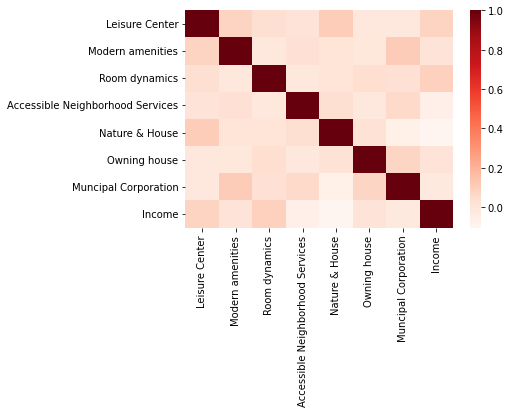

In [125]:
sns.heatmap(fscore_data.corr(), cmap="Reds")

In [126]:
vif_data = pd.DataFrame()
vif_data["feature"] = fscore_data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(fscore_data.values, i)
                          for i in range(len(fscore_data.columns))]
  
vif_data

,feature,VIF
0,Leisure Center,1.027986
1,Modern amenities,1.020753
2,Room dynamics,1.012028
3,Accessible Neighborhood Services,1.008948
4,Nature & House,1.031699
5,Owning house,1.008837
6,Muncipal Corporation,1.028498
7,Income,1.032412


# Modelling

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FactorAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import calculate_kmo

In [72]:
# # data3 = df.drop(['Pincode', 'Muncipal_corporation', 
#                  'Income','Hospitals_under_3kms','Own_house', 'house_Satisfaction_Yes_No',
#                  'Gas Pipeline','Public Washroom'], axis=1)

data3 = fscore_data

In [73]:
# data3.info()
fscore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Leisure Center                    206 non-null    float64
 1   Modern amenities                  206 non-null    float64
 2   Room dynamics                     206 non-null    float64
 3   Accessible Neighborhood Services  206 non-null    float64
 4   Nature & House                    206 non-null    float64
 5   Owning house                      206 non-null    float64
 6   Muncipal Corporation              206 non-null    float64
 7   Income                            206 non-null    float64
dtypes: float64(8)
memory usage: 13.0 KB


In [74]:
data3.describe()

,Leisure Center,Modern amenities,Room dynamics,Accessible Neighborhood Services,Nature & House,Owning house,Muncipal Corporation,Income
count,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02
mean,9.916555e-17,-9.862661e-17,-2.543812e-16,3.772603e-17,-4.554070e-17,-8.030254e-17,-1.616830e-17,-1.616830e-17
std,9.153442e-01,9.162974e-01,9.962291e-01,7.709146e-01,7.589077e-01,7.614319e-01,7.472610e-01,6.850883e-01
min,-9.396067e-01,-2.041291e+00,-1.312551e+00,-1.432579e+00,-1.381993e+00,-1.934328e+00,-1.859055e+00,-3.883074e+00
25%,-5.818607e-01,-5.985356e-01,-5.472342e-01,-5.208685e-01,-6.202286e-01,-4.825351e-01,-3.916825e-01,-3.437121e-01
50%,-2.391494e-01,2.661877e-01,-3.999982e-01,-2.144523e-01,-1.408886e-01,6.443577e-02,-9.560828e-02,8.621890e-02
75%,5.537892e-02,7.365762e-01,8.891894e-02,4.018936e-01,5.707910e-01,5.324399e-01,4.435263e-01,4.069814e-01
max,3.103844e+00,1.342322e+00,3.475535e+00,2.504369e+00,1.813282e+00,1.899550e+00,2.455640e+00,1.532524e+00


In [75]:
data3.columns

Index(['Leisure Center', 'Modern amenities', 'Room dynamics',
       'Accessible Neighborhood Services', 'Nature & House', 'Owning house',
       'Muncipal Corporation', 'Income'],
      dtype='object')

In [76]:
import seaborn as sns

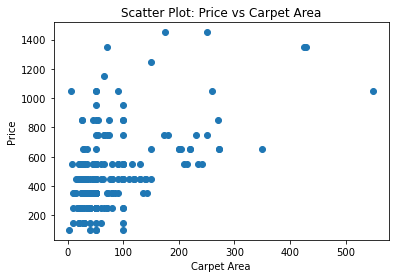

In [77]:
plt.scatter(df['Price'], df['Carpet_area1'])
plt.xlabel('Carpet Area')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs Carpet Area')
plt.show()

In [78]:
data_lr = data3.copy()

In [79]:
data_lr.columns

Index(['Leisure Center', 'Modern amenities', 'Room dynamics',
       'Accessible Neighborhood Services', 'Nature & House', 'Owning house',
       'Muncipal Corporation', 'Income'],
      dtype='object')

In [80]:
X = data_lr

In [81]:
y = data2['Price']

In [82]:
X.shape, y.shape

((206, 8), (206,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, test_size=.2)

In [84]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [85]:
pred_lr = lr1.predict(X_test)
diff_lr1 = pd.DataFrame({'Actual':y_test, 'Predicted': pred_lr})
diff_lr1.head()

,Actual,Predicted
67,175,131.152563
127,27,80.728720
39,40,18.911094
180,30,97.518973
168,100,72.456176


In [86]:
lr1.intercept_

78.39520002636515

In [87]:
pd.DataFrame({'coef':lr1.coef_}, index=lr1.feature_names_in_).to_excel('primary_coef.xlsx')

In [88]:
print("Training Score: {}".format(lr1.score(X_train, y_train)))
print("Testing Score: {}".format(lr1.score(X_test, y_test)))

Training Score: 0.42184832340723966
Testing Score: 0.5088899756256762


### Ridge Regression

In [89]:
from sklearn.linear_model import Ridge

ridreg = Ridge(alpha=20.0).fit(X_train, y_train)
print('House Price')
print('Ridge regression intercept:', ridreg.intercept_)
print('Ridge regression coefficients:', ridreg.coef_)
print('Training score {:.3f}'.format(ridreg.score(X_train, y_train)))
print('Testing score {:.3f}'.format(ridreg.score(X_test, y_test)))

House Price
Ridge regression intercept: 78.39386402770549
Ridge regression coefficients: [20.42344441 28.1754023  28.99603785  3.32987628 -4.79293412 -4.21336456
 -9.94789201  8.63305722]
Training score 0.415
Testing score 0.508


In [90]:
# Effect alpha regularization

alpha = [0, 1, 10, 20, 50, 100, 1000, 2000]
for i in alpha:
    linridge = Ridge(alpha=i).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_big = np.sum(abs(linridge.coef_)>1.0)
    
    print('Alpha : {:.2f}\nnumber of non-zero features: {} r_sq_train: {:.4f}, r_sq_test: {:.4f}\n'.format(i,num_coeff_big,r2_train,r2_test))

Alpha : 0.00
number of non-zero features: 8 r_sq_train: 0.4218, r_sq_test: 0.5089

Alpha : 1.00
number of non-zero features: 8 r_sq_train: 0.4218, r_sq_test: 0.5094

Alpha : 10.00
number of non-zero features: 8 r_sq_train: 0.4200, r_sq_test: 0.5109

Alpha : 20.00
number of non-zero features: 8 r_sq_train: 0.4154, r_sq_test: 0.5077

Alpha : 50.00
number of non-zero features: 8 r_sq_train: 0.3939, r_sq_test: 0.4838

Alpha : 100.00
number of non-zero features: 8 r_sq_train: 0.3527, r_sq_test: 0.4322

Alpha : 1000.00
number of non-zero features: 4 r_sq_train: 0.1047, r_sq_test: 0.1245

Alpha : 2000.00
number of non-zero features: 3 r_sq_train: 0.0582, r_sq_test: 0.0688



In [91]:
ridge = Ridge(alpha=1).fit(X_train, y_train)

In [92]:
pred_ridge = ridge.predict(X_test)
pred_ridge

array([130.78748984,  80.53791794,  19.33544609,  97.29734311,
        72.4650433 ,  16.98762294,  89.81881463,  71.36038707,
        71.49136064,  62.24944883,  60.43047325, 111.78433633,
        27.61221088, 155.64415734, 131.2823245 ,  93.88331742,
       103.98276845,  29.58284723, 176.69910147,  83.46947393,
        74.81599851,   7.72595681,  -2.88828713,  13.80218455,
        71.17336209,  42.03354816,  39.70564513,  94.06711201,
       135.32730633,  97.91782604, 228.1040779 ,  22.26024537,
       123.69659106,  20.69632375,  68.75505361, 146.23920361,
        -4.46681455,  31.56334635,  93.04229036,  54.52356488,
        35.56974212,  48.76317986])

### Lasso Regression

In [93]:
from sklearn.linear_model import Lasso

ridreg = Lasso(alpha=20.0).fit(X_train, y_train)
print('House Price')
print('Ridge regression intercept:', ridreg.intercept_)
print('Ridge regression coefficients:', ridreg.coef_)
print('Training score {:.3f}'.format(ridreg.score(X_train, y_train)))
print('Testing score {:.3f}'.format(ridreg.score(X_test, y_test)))

House Price
Ridge regression intercept: 78.62372299046446
Ridge regression coefficients: [ 3.05012097  7.81078272 13.45032495  0.         -0.         -0.
 -0.          0.        ]
Training score 0.194
Testing score 0.260


In [94]:
alpha = [0.5, 1, 2, 3, 5, 10, 20, 50, 100, 1000]
for i in alpha:
    linlasso = Lasso(i,max_iter=10000).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    print('Alpha: {:.2f}\nTrain_score: {:.4f}  Test_score: {:.4f}\n'.format(i, r2_train, r2_test))

Alpha: 0.50
Train_score: 0.4213  Test_score: 0.5164

Alpha: 1.00
Train_score: 0.4197  Test_score: 0.5220

Alpha: 2.00
Train_score: 0.4131  Test_score: 0.5274

Alpha: 3.00
Train_score: 0.4044  Test_score: 0.5267

Alpha: 5.00
Train_score: 0.3865  Test_score: 0.5125

Alpha: 10.00
Train_score: 0.3431  Test_score: 0.4507

Alpha: 20.00
Train_score: 0.1943  Test_score: 0.2600

Alpha: 50.00
Train_score: 0.0000  Test_score: -0.0000

Alpha: 100.00
Train_score: 0.0000  Test_score: -0.0000

Alpha: 1000.00
Train_score: 0.0000  Test_score: -0.0000



In [95]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

In [96]:
pred_lasso = lasso.predict(X_test)
pred_lasso

array([131.72549808,  75.41797341,  19.94024522,  91.47231094,
        70.2104394 ,  18.8180752 ,  88.65372326,  73.29726601,
        67.90372771,  65.50217903,  63.98144846, 101.20627257,
        29.89873517, 148.3299651 , 122.7258742 ,  91.82611248,
        99.71906023,  32.21802691, 172.72253334,  84.91829806,
        77.9526231 ,  14.10364295,   2.36302053,  15.56704956,
        73.72691233,  43.77763243,  45.4610724 ,  92.28956131,
       133.01040452,  93.39805406, 221.09572199,  22.57183008,
       114.81727974,  22.54523346,  67.79526439, 142.10493855,
        -0.73731477,  35.13768099,  91.30621372,  59.07913787,
        32.82906099,  49.27618594])

### Decision Trees

In [97]:
DT = DecisionTreeRegressor(random_state=0)
DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [98]:
pred = DT.predict(X_test)
pred

array([250.,  50.,  20.,  35., 200.,  10.,  35.,  35.,  50.,  70.,  50.,
        50.,  20., 272., 200., 120.,  48.,  45., 180.,  30., 100.,  15.,
        60.,  25., 120.,  12.,  50.,  50., 241.,  50., 100.,  50.,  50.,
        20.,  50., 209.,  10., 100., 120.,  50.,  50.,  22.])

In [99]:
DT.score(X_train, y_train)

1.0

In [100]:
r2_score(y_test, pred)

-0.02770388478485719

In [101]:
# Checking model performance on different

for i in range(1,10,1):
    DT = DecisionTreeRegressor(max_depth=i, random_state=0)
    DT.fit(X_train, y_train)
    print("Max-depth: {}\nTrainnig_Score: {:.4f}\nTesting_Score: {:.4f}".format(i,DT.score(X_train, y_train),r2_score(y_test, pred)))
    print("=====================================")

Max-depth: 1
Trainnig_Score: 0.2535
Testing_Score: -0.0277
Max-depth: 2
Trainnig_Score: 0.4570
Testing_Score: -0.0277
Max-depth: 3
Trainnig_Score: 0.5889
Testing_Score: -0.0277
Max-depth: 4
Trainnig_Score: 0.7348
Testing_Score: -0.0277
Max-depth: 5
Trainnig_Score: 0.8220
Testing_Score: -0.0277
Max-depth: 6
Trainnig_Score: 0.8818
Testing_Score: -0.0277
Max-depth: 7
Trainnig_Score: 0.9420
Testing_Score: -0.0277
Max-depth: 8
Trainnig_Score: 0.9718
Testing_Score: -0.0277
Max-depth: 9
Trainnig_Score: 0.9839
Testing_Score: -0.0277


In [102]:
from xgboost import XGBRFRegressor

In [103]:
xgb = XGBRFRegressor()
xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [104]:
pred_xg = xgb.predict(X_test)
pred_xg

array([250.74553 ,  70.85999 ,  26.300678,  51.10467 , 148.60751 ,
        31.824615,  70.7782  ,  53.154797,  41.525314,  59.792183,
        60.837162, 108.7054  ,  30.213146, 208.23413 , 134.91283 ,
        95.32869 ,  77.7875  ,  37.464706, 170.2101  , 104.576904,
        51.382263,  25.365908,  39.991516,  27.038044,  79.225464,
        37.80442 ,  55.162174,  71.94821 , 155.56377 ,  70.4425  ,
       164.60065 ,  38.463566,  87.48645 ,  28.767197,  68.24701 ,
       158.67728 ,  27.691442,  53.575474,  96.68934 ,  58.6023  ,
        35.681633,  31.04356 ], dtype=float32)

In [105]:
xgb.score(X_train, y_train)

0.9266836903088043

In [106]:
r2_score(y_test, pred_xg)

0.41888016030010267

### Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
pred_rf = rf.predict(X_test)
pred_rf

array([193.47,  70.05,  26.43,  51.8 , 126.39,  35.57,  73.68,  52.89,
        58.26,  63.29,  63.  , 139.44,  31.7 , 210.67, 122.17,  91.55,
        65.89,  40.79, 158.41, 110.1 ,  51.8 ,  24.01,  38.01,  26.01,
        78.  ,  45.09,  56.72,  72.58, 161.54,  64.71, 173.3 ,  40.62,
        79.69,  28.27,  66.84, 162.1 ,  28.33,  62.63,  85.97,  49.58,
        41.74,  29.41])

In [110]:
rf.score(X_train, y_train)

0.9069242184598771

In [111]:
rf.score(X_test, y_test)

0.4551901507695547

### Summary of all models

In [112]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [113]:
models = ['Linear regression', 'Ridge Regression', 'Lasso Regression']
l = [pred_lr,pred_ridge,pred_lasso]
l1=[]
for model in l:
    l1.append({'R2 score':r2_score(y_test, model), 'MAE':mean_absolute_error(y_test, model),
                            'MAPE':mean_absolute_percentage_error(y_test, model), 
                            'MSE':mean_squared_error(y_test, model),
                            'RMSE':np.sqrt(mean_squared_error(y_test, model))})
summary_models = pd.DataFrame(l1, index=models)
summary_models

,R2 score,MAE,MAPE,MSE,RMSE
Linear regression,0.508890,38.258328,0.737864,2665.861030,51.631977
Ridge Regression,0.509400,38.141024,0.735006,2663.093558,51.605170
Lasso Regression,0.522028,36.835299,0.696796,2594.543608,50.936663


In [114]:
summary_models.to_excel('Metrics/all_metric_primary.xlsx')

# Descriptive Statistics

In [115]:
df['Price'].mean()

79.32038834951456

In [116]:
df['Price'].median()

50.0

In [117]:
df['Price'].mode()

0    50
Name: Price, dtype: int64

In [118]:
df['Carpet_area1'].mean()

488.59223300970876

In [119]:
df['Carpet_area1'].median()

450.0

In [120]:
df['Carpet_area1'].mode()

0    450
Name: Carpet_area1, dtype: int64

In [121]:
df.describe()

,Pincode,distance_station,Hospitals_under_3kms,distance_clinic,distance_market,distance_school,highway,IS_Building,room_type,Staying_in_yrs.1,parking,Carpet_area1,Price,Balcony,Terrace,Lift,Pool,Gym,Kids refreshment area,Walking & cycling tracks,Gaming Parlor,Party halls,Parks & Gardens,Gas Pipeline,Public Washroom,Muncipal Corporation,Income1,own_house,house_sat
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,403610.393204,1752.825243,3.407767,650.592233,641.888350,927.728155,1.679612,0.665049,1.296117,1.271845,0.747573,488.592233,79.320388,0.470874,0.606796,0.412621,0.111650,0.208738,0.179612,0.165049,0.067961,0.135922,0.359223,0.354369,0.135922,4.271845,4.097087,0.757282,0.737864
std,7614.629620,1570.887858,2.125051,599.995113,583.394927,862.024466,0.665727,0.473123,0.554084,1.065597,0.435463,266.464584,78.396517,0.500367,0.489651,0.493505,0.315703,0.407397,0.384799,0.372129,0.252292,0.343541,0.480942,0.479487,0.343541,2.084527,3.042831,0.429771,0.440868
min,400002.000000,254.000000,1.000000,155.000000,150.000000,253.000000,0.000000,0.000000,1.000000,0.000000,0.000000,100.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,400070.000000,593.000000,2.000000,320.000000,319.750000,415.500000,2.000000,0.000000,1.000000,0.000000,0.250000,350.000000,30.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000
50%,400083.000000,970.000000,3.000000,461.500000,514.000000,630.500000,2.000000,1.000000,1.000000,1.000000,1.000000,450.000000,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,1.000000,1.000000
75%,400681.750000,2434.250000,5.000000,689.750000,766.500000,888.500000,2.000000,1.000000,1.000000,2.000000,1.000000,550.000000,100.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,6.000000,1.000000,1.000000
max,421605.000000,7716.000000,8.000000,4897.000000,4517.000000,4960.000000,2.000000,1.000000,3.000000,3.000000,1.000000,1450.000000,550.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,9.000000,1.000000,1.000000


In [122]:
df['parking'].value_counts()/ len(df) * 100

1    74.757282
0    25.242718
Name: parking, dtype: float64

In [123]:
# Calculate minimum
# minimum = df.min()

# Calculate maximum
# maximum = df.max()

# Calculate mean
# mean = df.mean()

# Calculate median
# median = df.median()

# Calculate mode
mode = df.mode().iloc[0]  # Mode may have multiple values, so we take the first one

# Calculate standard deviation
# std_dev = df.std()

# Display the results
result = pd.DataFrame({
#     'Minimum': minimum,
#     'Maximum': maximum,
#     'Mean': mean,
#     'Median': median,
    'Mode': mode,
#     'Std Dev': std_dev
})
print(result)

                                                   Mode
Pincode                                        400083.0
Nearest_station                                Vikhroli
Muncipal_corporation       Greater Mumbai (BMC or MCGM)
Income                                  1 Lakh - 3 Lakh
distance_station                                    293
Hospitals_under_3kms                                2.0
distance_clinic                                   461.0
distance_market                                   496.0
distance_school                                   477.0
highway                                             2.0
IS_Building                                         1.0
room_type                                           1.0
Staying_in_yrs.1                                    0.0
parking                                             1.0
Carpet_area1                                      450.0
Price                                              50.0
Own_house                                       

In [124]:
df[df['room_type'] == 1]['Carpet_area1'].mean()

403.8709677419355